In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [184]:
dataset = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022copy3.csv")

In [185]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [186]:
print(dataset)

         Tanggal OriginTime  Latitude  Longitude  Kedalaman (km)  Magnitude  \
0       1/1/2017   04:58:14   -8.9300   110.0500              10        4.0   
1       1/2/2017   21:02:24   -8.9400   108.7500              10        5.3   
2       1/3/2017   03:52:37   -8.3900   110.6900              10        3.1   
3       1/4/2017   00:44:38   -9.2700   113.4800              10        3.4   
4       1/5/2017   20:07:56   -9.8100   111.7500              10        3.2   
...          ...        ...       ...        ...             ...        ...   
2177  12/27/2022   00:38:27   -7.8601   110.5298              13        1.3   
2178  12/28/2022   02:19:49   -8.8718   112.4565              44        3.2   
2179  12/29/2022   00:33:56   -9.0316   112.1481              10        3.2   
2180  12/30/2022   00:02:38  -10.2996   113.2803              10        3.6   
2181  12/31/2022   01:02:38  -10.2996   113.2803              10        3.6   

     Type                                         K

In [187]:
train_dates = pd.to_datetime(dataset['Tanggal'])

In [188]:
data = dataset[['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']]
values = data.values
values = values.astype('float64')

In [189]:
values.dtype

dtype('float64')

In [190]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [191]:
data_for_training = data[['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']].astype(float)

In [192]:
scaler = StandardScaler()
scaler = scaler.fit(data_for_training)
data_for_training_scaled = scaler.transform(data_for_training)

In [193]:
train_X = []
train_y = []

In [194]:
n_future = 1
n_past = 30

for i in range(n_past, len(data_for_training_scaled) - n_future +1):
    train_X.append(data_for_training_scaled[i - n_past:i, 0:data_for_training.shape[1]])
    train_y.append(data_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [195]:
train_X, train_y = np.array(train_X), np.array(train_y)

In [196]:
X_training, X_test, y_training, y_test  = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [197]:
print(X_training.shape, y_training.shape, X_test.shape, y_test.shape)

(1721, 30, 4) (1721, 1) (431, 30, 4) (431, 1)


In [198]:
print('train_X shape =={}.'.format(train_X.shape))
print('train_y shape =={}.'.format(train_y.shape))

train_X shape ==(2152, 30, 4).
train_y shape ==(2152, 1).


In [199]:
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# Third LSTM layer
model.add(LSTM(units=48,activation='relu', return_sequences=True))
model.add(LSTM(units=32,activation='relu', return_sequences=True))
model.add(LSTM(units=16,activation='relu', return_sequences=True))
# Fourth LSTM layer
model.add(LSTM(units=16, activation='relu'))
# The output layer
model.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 30, 64)            17664     
                                                                 
 lstm_31 (LSTM)              (None, 30, 48)            21696     
                                                                 
 lstm_32 (LSTM)              (None, 30, 32)            10368     
                                                                 
 lstm_33 (LSTM)              (None, 30, 16)            3136      
                                                                 
 lstm_34 (LSTM)              (None, 16)                2112      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 54,993
Trainable params: 54,993
Non-trai

In [200]:
optimizer=Adam(learning_rate=0.003)

In [201]:
model.compile(optimizer=optimizer, loss='mse')

In [202]:
history = model.fit(X_training, y_training, epochs=500, batch_size=72, validation_data=(X_test, y_test), verbose=2, callbacks=[checkpoint])

Epoch 1/500



Epoch 1: val_loss improved from inf to 1.26711, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 6s - loss: 0.9397 - val_loss: 1.2671 - 6s/epoch - 247ms/step
Epoch 2/500

Epoch 2: val_loss did not improve from 1.26711
24/24 - 1s - loss: 1.1480 - val_loss: 1.2905 - 1s/epoch - 54ms/step
Epoch 3/500

Epoch 3: val_loss improved from 1.26711 to 1.23249, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 1s - loss: 0.9364 - val_loss: 1.2325 - 1s/epoch - 47ms/step
Epoch 4/500

Epoch 4: val_loss improved from 1.23249 to 1.22634, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 1s - loss: 0.9245 - val_loss: 1.2263 - 1s/epoch - 50ms/step
Epoch 5/500

Epoch 5: val_loss did not improve from 1.22634
24/24 - 1s - loss: 0.9244 - val_loss: 1.2444 - 1s/epoch - 47ms/step
Epoch 6/500

Epoch 6: val_loss improved from 1.22634 to 1.22583, saving model to C:\Users\wajit\Documents\GitHu

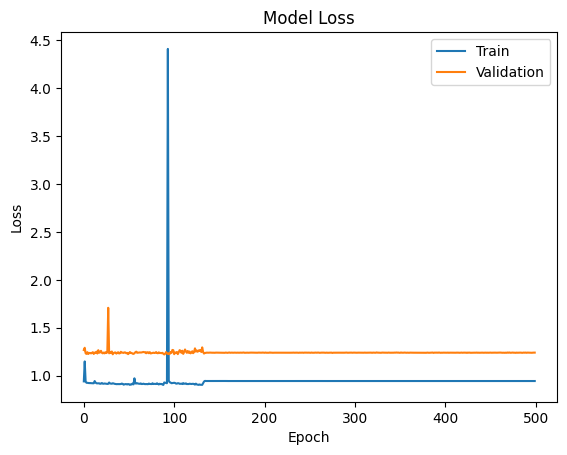

In [203]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [204]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5")
loss = model.evaluate(X_test, y_test)
print("Loss:", loss)

14/14 [==============================] - 1s 11ms/step - loss: 1.2205
Loss: 1.2205289602279663


In [205]:
n_past = 1
n_days_for_prediction=366
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='1d').tolist()
print(predict_period_dates)

[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00'), Timestamp('2023-01-06 00:00:00'), Timestamp('2023-01-07 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-16 00:00:00'), Timestamp('2023-01-17 00:00:00'), Timestamp('2023-01-18 00:00:00'), Timestamp('2023-01-19 00:00:00'), Timestamp('2023-01-20 00:00:00'), Timestamp('2023-01-21 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-23 00:00:00'), Timestamp('2023-01-24 00:00:00'), Timestamp('2023-01-25 00:00:00'), Timestamp('2023-01-26 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-01-28 00:00:00'), Timestamp('20

In [206]:
prediction = model.predict(X_training[-n_days_for_prediction:])

12/12 [==============================] - 1s 11ms/step


In [207]:
print(prediction)

[[ 0.06770863]
 [ 0.08497968]
 [ 0.08978481]
 [ 0.07304848]
 [ 0.06436497]
 [ 0.06652313]
 [ 0.08056258]
 [-0.30967084]
 [-0.41910484]
 [-0.11962048]
 [-0.30834135]
 [-0.31673706]
 [ 0.06065503]
 [ 0.06627449]
 [ 0.07684567]
 [ 0.06409013]
 [ 0.06638684]
 [ 0.05958034]
 [ 0.06563797]
 [ 0.07073612]
 [ 0.06550413]
 [ 0.07005597]
 [-0.28321263]
 [ 0.07364685]
 [ 0.07043881]
 [ 0.04018732]
 [-0.06342774]
 [-0.13477893]
 [-0.12098257]
 [ 0.06815507]
 [ 0.09678105]
 [-0.27152717]
 [ 0.04941031]
 [ 0.07669041]
 [ 0.06949671]
 [-0.053385  ]
 [ 0.05624262]
 [ 0.07769825]
 [-0.28934357]
 [-0.182623  ]
 [ 0.06814747]
 [-0.2916417 ]
 [-0.11243003]
 [ 0.06789605]
 [ 0.07762507]
 [ 0.0841757 ]
 [ 0.07440073]
 [ 0.07490157]
 [ 0.07853443]
 [ 0.07698493]
 [-0.29568917]
 [-0.29098853]
 [ 0.08357827]
 [ 0.08600546]
 [ 0.06103687]
 [-0.41226038]
 [ 0.06571146]
 [ 0.06116429]
 [ 0.06616966]
 [-0.07518556]
 [-0.18972525]
 [ 0.08857048]
 [-0.27025157]
 [ 0.07361581]
 [ 0.06611983]
 [ 0.06569753]
 [ 0.07910

In [208]:
prediction_copies = np.repeat(prediction, data_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,-1]
y_pred_future = np.abs(y_pred_future)

C:\Users\wajit\AppData\Local\Temp\ipykernel_11972\1641840117.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Tanggal']=pd.to_datetime(original['Tanggal'])


<Axes: xlabel='Tanggal', ylabel='Magnitude'>

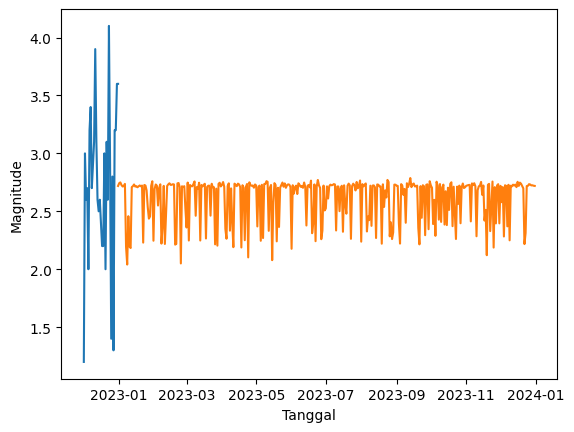

In [209]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Tanggal': np.array(forecast_dates), 'Magnitude': y_pred_future})
df_forecast['Tanggal'] = pd.to_datetime(df_forecast['Tanggal'])


original = dataset[['Tanggal', 'Magnitude']]
original['Tanggal']=pd.to_datetime(original['Tanggal'])
original = original.loc[original['Tanggal'] >= '2022-12-1']

sns.lineplot(x=original['Tanggal'], y=original['Magnitude'])
sns.lineplot(x=df_forecast['Tanggal'], y=df_forecast['Magnitude'])